In [1]:
import cv2 as cv

imageFile = './data/lena.jpg'
img = cv.imread(imageFile) # true color
img2 = cv.imread(imageFile, 0) # gradyscale
cv.imshow('Lena color', img)
cv.imshow('Lena grayscale', img2)

cv.waitKey()
cv.destroyAllWindows()

In [2]:
import cv2 as cv

imageFile = './data/lena.jpg'
img = cv.imread(imageFile)
cv.imwrite('./data/Lena.bmp', img)
cv.imwrite('./data/Lena.png', img)
cv.imwrite('./data/Lena2.png', img, [cv.IMWRITE_PNG_COMPRESSION, 9])
cv.imwrite('./data/Lena2.jpg', img, [cv.IMWRITE_JPEG_QUALITY, 90])

True

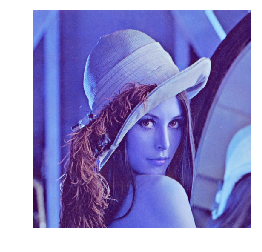

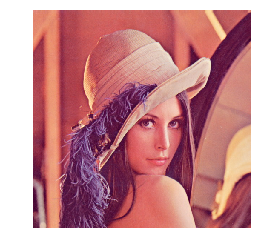

In [3]:
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline

imageFile = './data/lena.jpg'
imgBGR = cv.imread(imageFile)
plt.axis('off')
plt.imshow(imgBGR)
plt.show()

imgRGB = cv.cvtColor(imgBGR, cv.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(imgRGB)
plt.show()

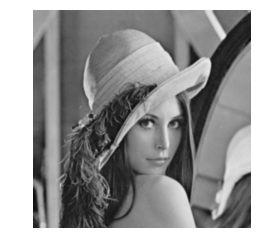

In [4]:
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline

imageFile = './data/lena.jpg'
imgGray = cv.imread(imageFile, cv.IMREAD_GRAYSCALE)
plt.axis('off')
plt.imshow(imgGray, cmap = "gray", interpolation='bicubic')
plt.show()

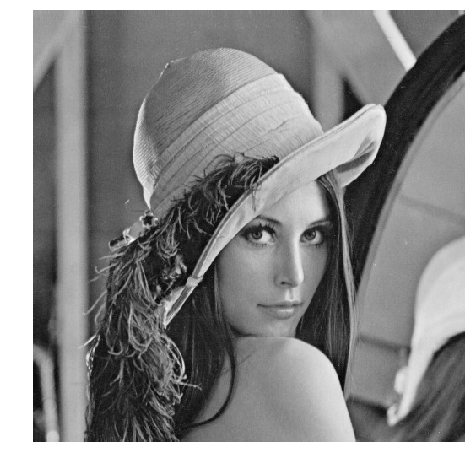

In [5]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

imageFile = './data/lena.jpg'
imgGray = cv2.imread(imageFile, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.imshow(imgGray, cmap = 'gray')
plt.axis('tight')
plt.axis('off')
plt.savefig('./data/0205.png')
plt.show()

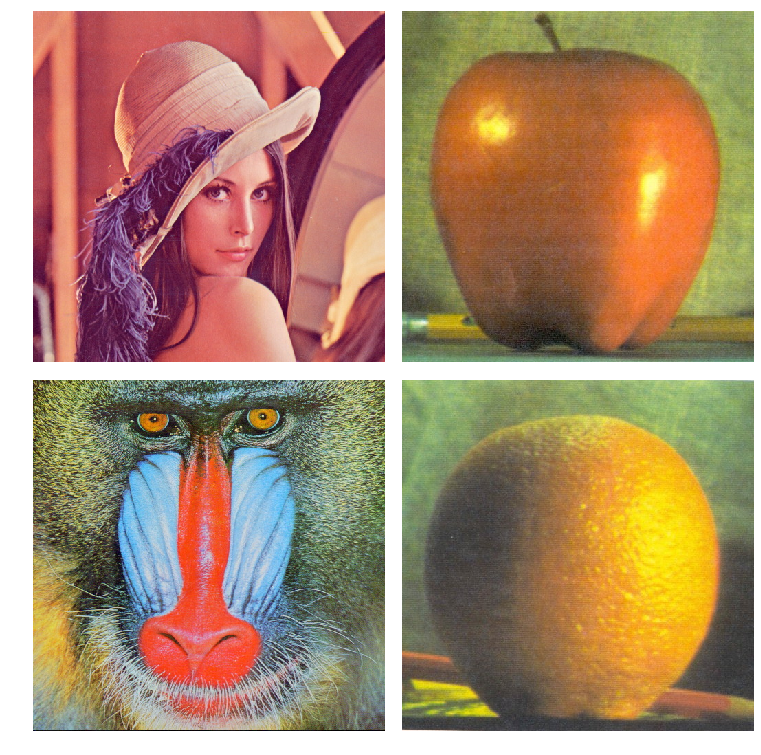

In [6]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

path = './data/'
imgBGR1 = cv2.imread(path+'lena.jpg')
imgBGR2 = cv2.imread(path+'apple.jpg')
imgBGR3 = cv2.imread(path+'baboon.jpg')
imgBGR4 = cv2.imread(path+'orange.jpg')

# BGR -> RGB
imgRGB1 = cv2.cvtColor(imgBGR1, cv2.COLOR_BGR2RGB)
imgRGB2 = cv2.cvtColor(imgBGR2, cv2.COLOR_BGR2RGB)
imgRGB3 = cv2.cvtColor(imgBGR3, cv2.COLOR_BGR2RGB)
imgRGB4 = cv2.cvtColor(imgBGR4, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize=(10,10), sharey=True)
fig.canvas.set_window_title('Sample Pictures')

ax[0][0].axis('off')
ax[0][0].imshow(imgRGB1, aspect = 'auto')

ax[0][1].axis('off')
ax[0][1].imshow(imgRGB2, aspect = 'auto')

ax[1][0].axis('off')
ax[1][0].imshow(imgRGB3, aspect = "auto")

ax[1][1].axis('off')
ax[1][1].imshow(imgRGB4, aspect = 'auto')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1,
                    wspace=0.05, hspace=0.05)
plt.savefig("./data/0206.png", bbox_inches='tight')
plt.show()

In [7]:
import cv2

cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture('./data/vtest.avi')
#cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
#cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size =', frame_size)

while True:   
    retval, frame = cap.read() # frame capture
    if not retval:
        break

    cv2.imshow('frame',frame)
    
    key = cv2.waitKey(25)
    if key == 27: # keyboard(Esc)
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()

frame_size = (640, 480)


In [8]:
import cv2

cap = cv2.VideoCapture('http://<IP Address>:4747/video') # droid cam
#cap = cv2.VideoCapture('http://172.30.1.18:4747/mjpegfeed?640x480')
#cap = cv2.VideoCapture('http://172.30.1.18:8080/video')  # IP Webcam

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size =', frame_size)

while True:   
    retval, frame = cap.read() # frame capture
    if not retval:
        break

    cv2.imshow('frame',frame)
    
    key = cv2.waitKey(25)
    if key == 27: # Esc
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()

frame_size = (0, 0)


In [9]:
'''
 pip install youtube_dl
 pip install pafy
'''
import cv2, pafy
url = 'https://www.youtube.com/watch?v=u_Q7Dkl7AIk'
video = pafy.new(url)
print('title = ', video.title)
print('video.rating = ', video.rating)
print('video.duration = ', video.duration)

best = video.getbest(preftype='webm')     # 'mp4','3gp'
print('best.resolution', best.resolution)

file = best.download(filepath="./data/demovideo." + best.extension)
cap = cv2.VideoCapture(file)

while(True):
    retval, frame = cap.read()
    if not retval:
        break
    cv2.imshow('frame',frame)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,100,200)
    cv2.imshow('edges',edges)

    key = cv2.waitKey(25)
    if key == 27: # Esc
        break

cv2.destroyAllWindows()

title =  Jeju Island Korea Travel Guide + Attractions Map
video.rating =  4.81101131439
video.duration =  00:02:42
best.resolution 640x360


In [10]:
import cv2

cap = cv2.VideoCapture(0) 
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size =', frame_size)

#fourcc = cv2.VideoWriter_fourcc(*'DIVX')  # ('D', 'I', 'V', 'X')
fourcc = cv2.VideoWriter_fourcc(*'XVID')

out1 = cv2.VideoWriter('./data/record0.mp4',fourcc, 20.0, frame_size)
out2 = cv2.VideoWriter('./data/record1.mp4',fourcc, 20.0, frame_size,isColor=False)

while True:
    retval, frame = cap.read()
    if not retval:
        break   
    out1.write(frame)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    out2.write(gray)        
    cv2.imshow('frame',frame)
    cv2.imshow('gray',gray)      
    
    key = cv2.waitKey(25)
    if key == 27:
        break
cap.release()
out1.release()
out2.release()
cv2.destroyAllWindows()

frame_size = (640, 480)


start capture ...


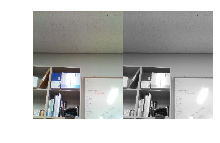

finish capture.


In [12]:
# 0215.py
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

class Video(animation.FuncAnimation):
    def __init__(self, device=0, fig=None, frames=None,
                       interval=80, repeat_delay=5, blit=False, **kwargs):
        if fig is None:
            self.fig, self.ax = plt.subplots(1, 2, figsize=(2.5,1.5))
            self.fig.canvas.set_window_title('Video Capture')
            self.ax[0].set_position([0, 0, 0.5, 1])
            self.ax[0].axis('off')

            self.ax[1].set_position([0.5, 0, 0.5, 1])
            self.ax[1].axis('off')
##            plt.subplots_adjust(left=0,bottom=0,right=1,top=1,
##                                wspace=0.05,hspace=0.05)
            
        super(Video, self).__init__(self.fig, self.updateFrame, init_func=self.init,
                                   frames=frames, interval=interval, blit=blit,
                                   repeat_delay=repeat_delay, **kwargs)        
        self.cap = cv2.VideoCapture(device)
        print('start capture ...')
        
    def init(self): 
        retval, self.frame = self.cap.read()
        if retval:
            self.im0 = self.ax[0].imshow(cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB),
                                      aspect = 'auto')
            gray = cv2.cvtColor(self.frame, cv2.COLOR_BGR2GRAY)
            self.im1 = self.ax[1].imshow(cv2.merge((gray,gray,gray)),
                                      aspect = 'auto')        
            
    def updateFrame(self, k):
        retval, self.frame = self.cap.read()
        if retval:
            self.im0.set_array(cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB))
            self.im1.set_array(cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB))
            
    def close(self):
        if self.cap.isOpened():
            self.cap.release()
        print('finish capture.')

# begin
camera = Video()
plt.show()
camera.close()